In [1]:
import ieeg_utilities as ieeg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
n_clusters = 6

data_mat = loadmat('../data/ID07_32h.mat')
info_mat = loadmat('../data/ID07_info.mat')
fs = float(info_mat['fs'])
sample_begin = int(np.round(10 * 60 * fs))
sample_end = int(np.round(sample_begin + 6 * 60 * fs))
data = data_mat['EEG'][:, sample_begin:sample_end].transpose()
data_mat = []
data.shape

(184320, 75)

In [5]:
kde_x, kde = ieeg.distribution(data, xlim=(-250, 250))

df_kde = ieeg.node_reduction(kde, n_clusters=n_clusters, sample_labels=kde_x, plot=False)

normal = np.sort(np.random.normal(size=data.shape[0]))
df_qq = ieeg.node_reduction(np.sort(data, axis=0), n_clusters=n_clusters, sample_labels=normal, plot=False)

Compute KDE of channel: 0
Compute KDE of channel: 1
Compute KDE of channel: 2
Compute KDE of channel: 3
Compute KDE of channel: 4
Compute KDE of channel: 5
Compute KDE of channel: 6
Compute KDE of channel: 7
Compute KDE of channel: 8
Compute KDE of channel: 9
Compute KDE of channel: 10
Compute KDE of channel: 11
Compute KDE of channel: 12
Compute KDE of channel: 13
Compute KDE of channel: 14
Compute KDE of channel: 15
Compute KDE of channel: 16
Compute KDE of channel: 17
Compute KDE of channel: 18
Compute KDE of channel: 19
Compute KDE of channel: 20
Compute KDE of channel: 21
Compute KDE of channel: 22
Compute KDE of channel: 23
Compute KDE of channel: 24
Compute KDE of channel: 25
Compute KDE of channel: 26
Compute KDE of channel: 27
Compute KDE of channel: 28
Compute KDE of channel: 29
Compute KDE of channel: 30
Compute KDE of channel: 31
Compute KDE of channel: 32
Compute KDE of channel: 33
Compute KDE of channel: 34
Compute KDE of channel: 35
Compute KDE of channel: 36
Compute KDE

Make KDE plot
Make QQ plots


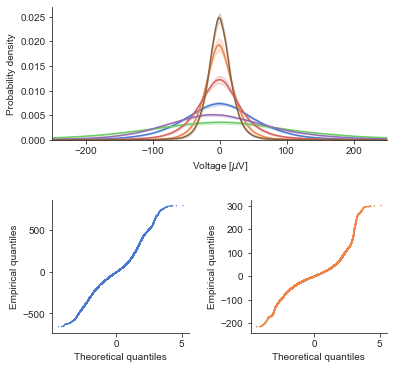

In [8]:
sns.set_style('ticks')
palette = sns.color_palette('muted', n_clusters)

print('Make KDE plot')
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(nrows=12, ncols=12)
ax = [[] for i in range(3)]
ax[0] = fig.add_subplot(gs[:5, :])
sns.lineplot(x='sample_label', y='value', data=df_kde, hue='cluster', palette=palette, ax=ax[0])
ax[0].spines['right'].set_visible(False), ax[0].spines['top'].set_visible(False)
ax[0].get_legend().remove()
ax[0].set_ylim(bottom=0)
ax[0].set_xlim(-250, 250)
ax[0].set_xlabel('Voltage [$\mu$V]')
ax[0].set_ylabel('Probability density')

print('Make QQ plots')
ax[1] = fig.add_subplot(gs[7:, :5])
for k in range(df_qq.shape[0]):
    if df_qq['cluster'][k] == 0:
        node = df_qq['node'][k]
        break
sns.scatterplot(x='sample_label', y='value', data=df_qq.where(df_qq['node'] == node),
                ax=ax[1], label='from cluster ' + str(0), edgecolor=palette[0], facecolor='none', s=.3)
ax[1].spines['right'].set_visible(False), ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel('Theoretical quantiles')
ax[1].set_ylabel('Empirical quantiles')
ax[1].get_legend().remove()

ax[2] = fig.add_subplot(gs[7:, 7:])
for k in range(df_qq.shape[0]):
    if df_qq['cluster'][k] == 1:
        node = df_qq['node'][k]
        break
sns.scatterplot(x='sample_label', y='value', data=df_qq.where(df_qq['node'] == node),
                ax=ax[2], label='from cluster ' + str(1), edgecolor=palette[1], facecolor='none', s=.6)
ax[2].spines['right'].set_visible(False), ax[2].spines['top'].set_visible(False)
ax[2].set_xlabel('Theoretical quantiles')
ax[2].set_ylabel('Empirical quantiles')
ax[2].get_legend().remove()

plt.savefig('figures/Ch2_Distribution.png', dpi=300)
plt.show()

Compute FFT of channel: 0
Compute FFT of channel: 1
Compute FFT of channel: 2
Compute FFT of channel: 3
Compute FFT of channel: 4
Compute FFT of channel: 5
Compute FFT of channel: 6
Compute FFT of channel: 7
Compute FFT of channel: 8
Compute FFT of channel: 9
Compute FFT of channel: 10
Compute FFT of channel: 11
Compute FFT of channel: 12
Compute FFT of channel: 13
Compute FFT of channel: 14
Compute FFT of channel: 15
Compute FFT of channel: 16
Compute FFT of channel: 17
Compute FFT of channel: 18
Compute FFT of channel: 19
Compute FFT of channel: 20
Compute FFT of channel: 21
Compute FFT of channel: 22
Compute FFT of channel: 23
Compute FFT of channel: 24
Compute FFT of channel: 25
Compute FFT of channel: 26
Compute FFT of channel: 27
Compute FFT of channel: 28
Compute FFT of channel: 29
Compute FFT of channel: 30
Compute FFT of channel: 31
Compute FFT of channel: 32
Compute FFT of channel: 33
Compute FFT of channel: 34
Compute FFT of channel: 35
Compute FFT of channel: 36
Compute FFT

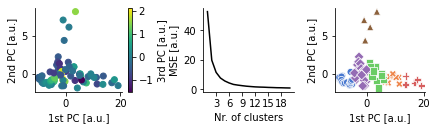

In [3]:
spect, freq = ieeg.fft(data[:-500,:], fs=fs, downscale_factor=10)
spect = spect / data.shape[0]
df = ieeg.node_reduction(spect, n_clusters, sample_labels=freq, plot=True)

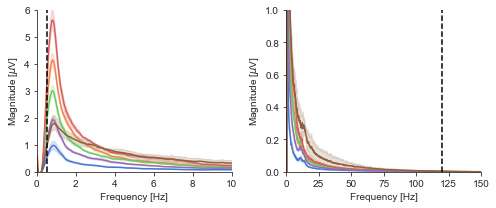

In [4]:
sns.set_style('ticks')
fig = plt.figure(figsize=(7, 3))
gs = fig.add_gridspec(nrows=1, ncols=2)
ax = [[] for i in range(2)]

ax[0] = fig.add_subplot(gs[:, :1])
sns.lineplot(x='sample_label', y='value', data=df, hue='cluster', palette='muted')
plt.plot([.5, .5], [0, 6], color='black', ls='--')
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 6)
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude [$\mu$V]')

ax[1] = fig.add_subplot(gs[:, 1:])
sns.lineplot(x='sample_label', y='value', data=df, hue='cluster', palette='muted')
plt.plot([120, 120], [0, 2], color='black', ls='--')
ax[1].set_xlim(0, 150)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude [$\mu$V]')

for i in range(2):
    ax[i].get_legend().remove()
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('figures/Ch2_FFT.png', dpi=300)
plt.show()

In [19]:
int(data[:-500].shape[0]/500)-2

365

In [13]:
data.shape

(184320, 75)

In [ ]:
7*1